# Draw better Labels in Networkx

The drawing code for `draw_nice_labels`.

In [219]:
import matplotlib.pyplot as plt
import networkx as nx
from string import ascii_letters

def rescale(layout,scaler):
    for l in layout:
       layout[l] *= scaler

def s_del (vdelta, vrange):
    if vdelta is None:
        return .16 * vrange
    else:
        return vdelta
    
def make_name(prefix = '',namelen=10):
    return ''.join(random.sample(ascii_letters, namelen))

def nx_custom_draw(G, seed=49, xmax_delta=None, xmin_delta=None, ymax_delta=None, ymin_delta=None,
                   scaler=1, font_size=10, edge_color='#AAAAAA', label_delta=None,
                   layout_algorithm=nx.layout.spring_layout, k=None,
                   font_color='k', node_color=None, node_size=300, figsize=None,
                   font_weight='normal',node_shape='o',node_edgecolors=None,linewidths=1,
                   title=None, title_fontsize=14, verbose = 0):
    """
    Choose a desired layout by varying the seed.  Then adjust x/y max/min delta vals as needed.
    
    Scaler seems to have little effect.  If label positions need adjusting turn on verbose
    and inspect vals of x/y max/min delta vals
    
    figsize = (width,height)
    """
    layout = layout_algorithm(G,seed=random_seed,k=k)
    rescale(layout,scaler)
    x, y = zip(*list(layout.values()))
    x_min, y_min, x_max,y_max = min(x), min(y), max(x), max(y)
    # Stupid mpl state machine reuses same axis unless forced not to by label
    if figsize is not None:
        #e.g, figsize=(12,12)
        plt.figure(figsize=figsize) 
    ax  = plt.subplot(111, label=make_name())
    x_range, y_range = x_max-x_min, y_max-y_min 
    xmin_delta,ymin_delta = s_del(xmin_delta,x_range),s_del(ymin_delta,y_range)
    xmax_delta,ymax_delta = s_del(xmax_delta,x_range),s_del(ymax_delta,y_range)
    if verbose:
        print('deltas', xmin_delta,xmax_delta,ymin_delta,ymax_delta)
    ax.set_xlim((x_min-xmin_delta,x_max+xmax_delta))
    ax.set_ylim((y_min-ymin_delta,y_max+ymax_delta))

    nx.draw_networkx_nodes(G,layout,node_color=node_color,node_size=node_size,ax=ax,
                          node_shape=node_shape,edgecolors=node_edgecolors,linewidths=linewidths)
    nx.draw_networkx_edges(G,layout,edge_color=edge_color,ax=ax)
    
    if label_delta is None:
        label_delta = scaler / 9.09
        if verbose:
           print('label_delta', label_delta)
    for l in layout:
        layout[l][1] += label_delta
    nx.draw_networkx_labels(G, layout, verticalalignment='center', font_size=font_size,
                            font_color=font_color, font_weight=font_weight, ax = ax)
    ax.set_title(title,fontsize=title_fontsize)

## Graph defined as edgelist

Minimal customization, adjusting right border of graph.

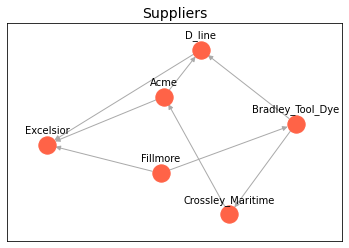

In [220]:
edgelist_st_new = \
[
'Acme  D_line {"buy parts":1}', 
'Acme  Excelsior {"buy parts":1}',
'D_line  Excelsior {"buy parts":1}',
'Fillmore  Excelsior {"buy parts":1}',
'Fillmore  Bradley_Tool_Dye {"buy parts":1}',
'Bradley_Tool_Dye  Crossley_Maritime {"buy parts":1}',
'Bradley_Tool_Dye  D_line {"buy parts":1}',
'Crossley_Maritime  Acme {"buy parts":0}']

G2 = nx.parse_edgelist(edgelist_st_new,create_using=nx.DiGraph())
random_seed = 49

# xmax_delta = .34 chosen by eyeballing as shown  Layout held constant with constant random seed.
#draw_nice_labels(G2, title= 'Suppliers', scaler = 1,seed = random_seed)
# Check out default numerical values before setting
#draw_nice_labels(G2, title= 'Suppliers', scaler = 1,seed = random_seed, verbose = 1)
nx_custom_draw(G2, title= 'Suppliers', seed = random_seed, xmax_delta=.34,node_color='tomato')

## Karate

Lots of customization illustrated.

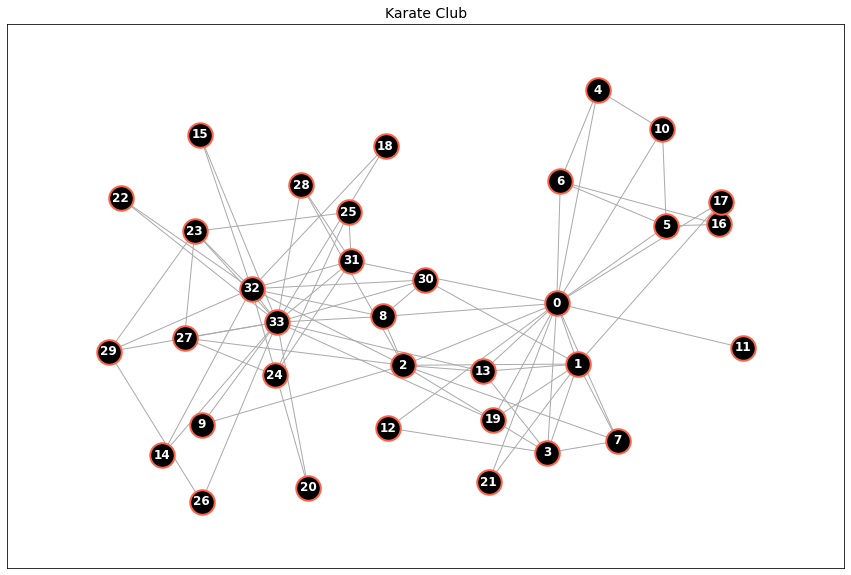

In [221]:
import math
G3 = nx.karate_club_graph()
sparser = 5
default_k = 1/math.sqrt(len(G3))
k = sparser * default_k
random_seed = 49
figsize=(15,10) 
scaler = 1
#scaler = 5
verbose = 0
#verbose = 1
nx_custom_draw(G3, scaler=scaler, title= 'Karate Club', seed = random_seed, k=k,verbose=verbose,
                node_color='k',label_delta=0,font_size = 12,font_color='white', node_size=600, 
                font_weight='bold',node_edgecolors='tomato',linewidths=2,figsize=figsize)